# 多项式回归
1. 描述：研究一个因变量与一个或多个自变量间多项式的回归分析方法，多项式回归问题可以通过变量转换化为多元线性回归问题来解决
2. 分类
    - 一元多项式回归
    - 多元多项式回归
3. 思路
    - 基于现有特征，增加特征次数来获得“新特征”，使其能够更好的模拟数据
4. PolynomialFeatures中的degree
    - 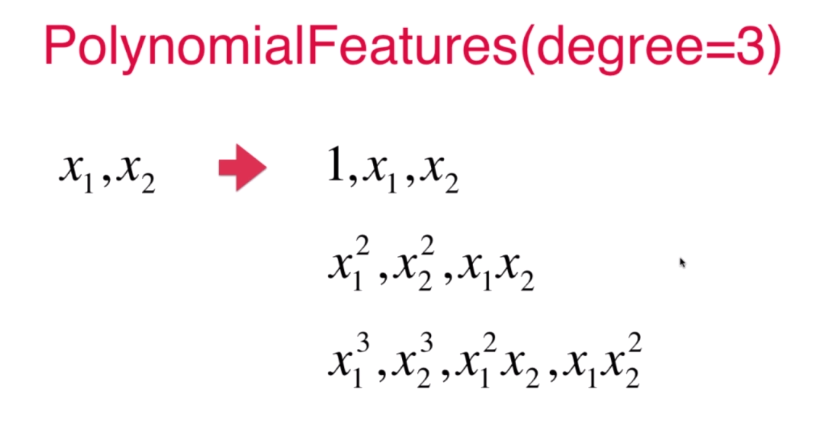

5. sklearn中的Pipeline机制
    1. 作用：对于固定的一系列数据处理操作，可以用Pipeline对象来封装后直接调用
    2. 使用方法：Pipeline对象接受二元tuple构成的list，每一个二元tuple中的第一个元素为arbitrary identifier string，我们用以获取Pipeline对象中的individual elements，二元tuple中的第二个元素是sklearn与之相适配的transformer或者estimator
    3. 可能的流程：
        - 特征标准化是需要的，可作为第一个环节
        - 中间可加上数据降维等（如PCA）
        - 假如是分类器，则classifier是少不了的，可作为最后一个环节
    4. 流程分析：Pipeline的中间过程由sklearn相适配的转换器transformer构成，最后一步是一个评估器estimator
6. 过拟合与欠拟合
    - 过拟合：算法所训练的模型不能完整的表述数据的关系
    - 欠拟合：算法所训练的模型过多的表达了数据间的噪音关系
7. 学习曲线
    - 随着训练样本的逐渐增多，算法所训练的模型的表现能力
    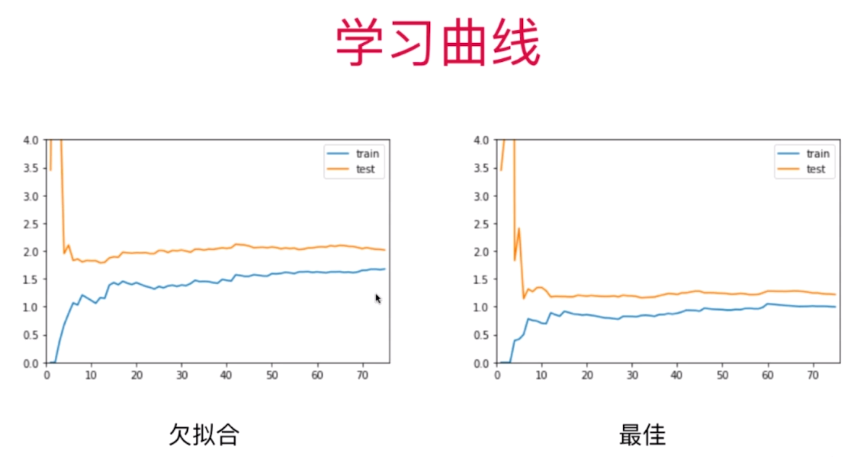
    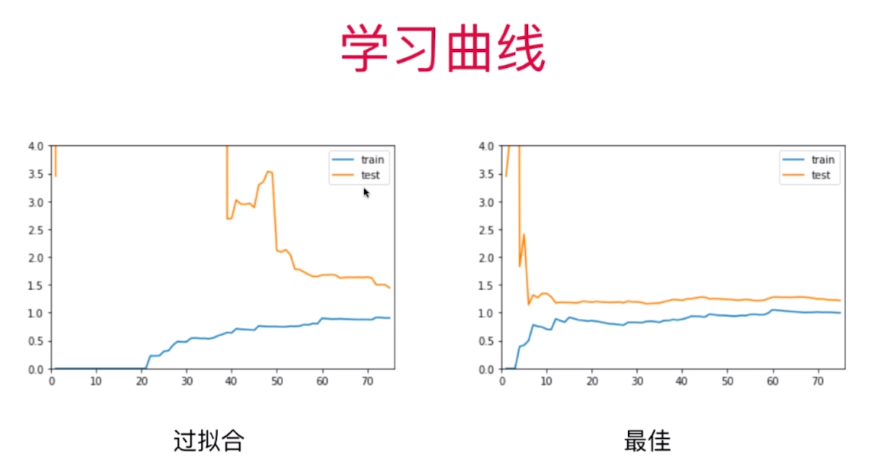
8. 岭回归
    - 一种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法
    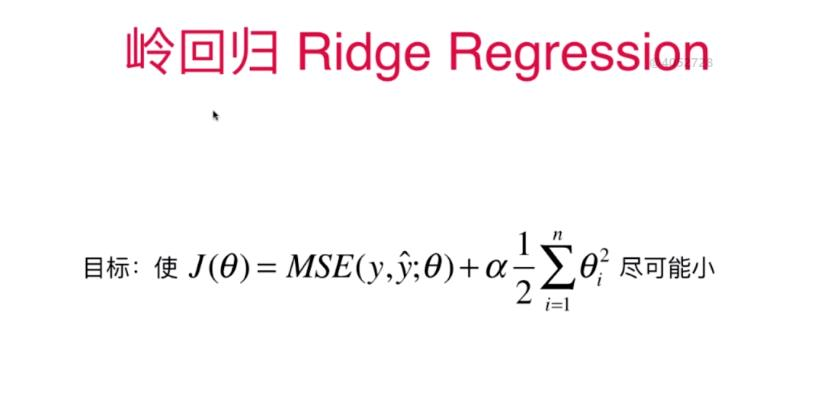
    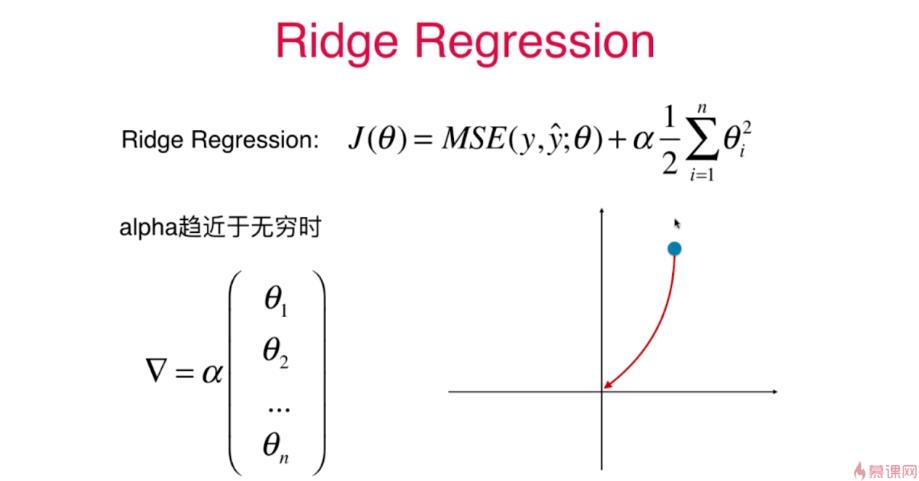
9. LASSO回归
    - 通过构造一个惩罚函数得到一个较为精炼的模型，使得它压缩一些系数，同时设定一些系数为零。因此保留了子集收缩的优点，是一种处理具有复共线性数据的有偏估计。
    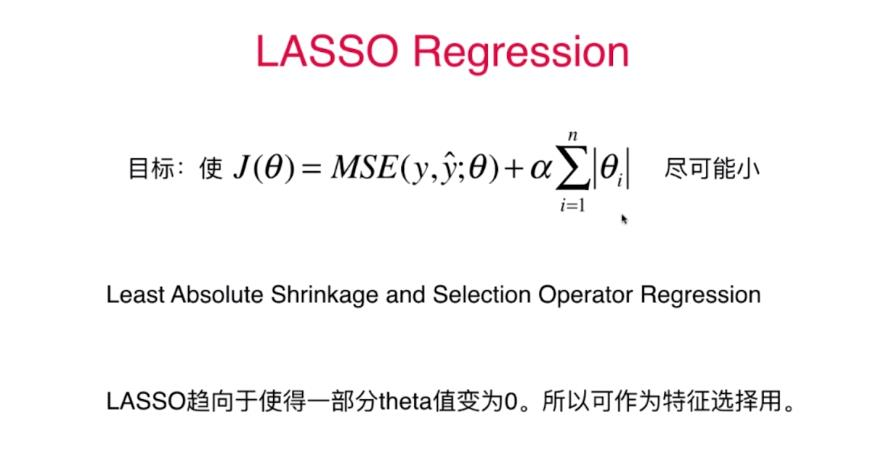
    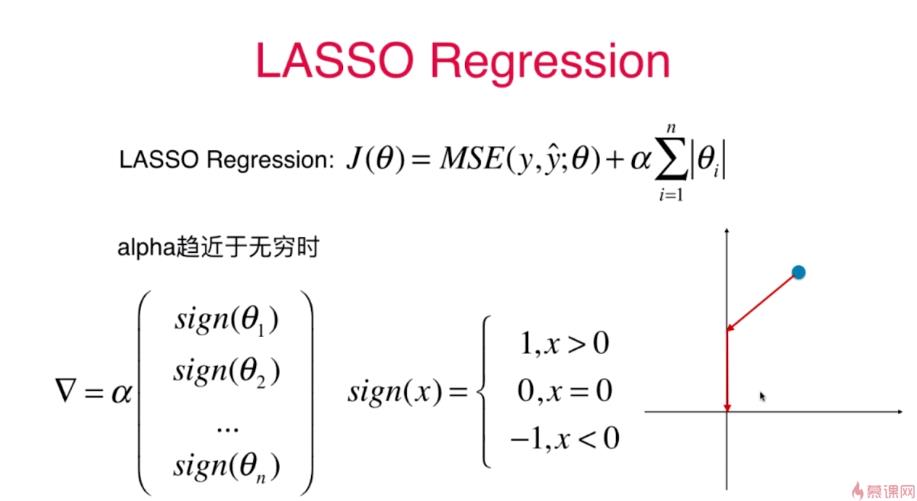
10. LP范数
    - 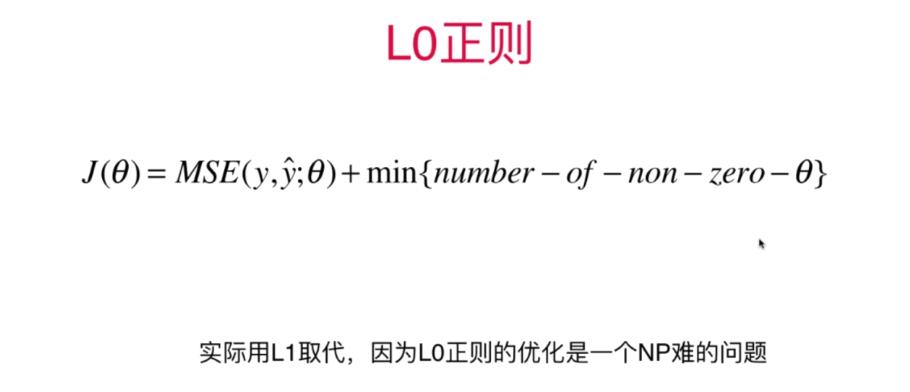
    - 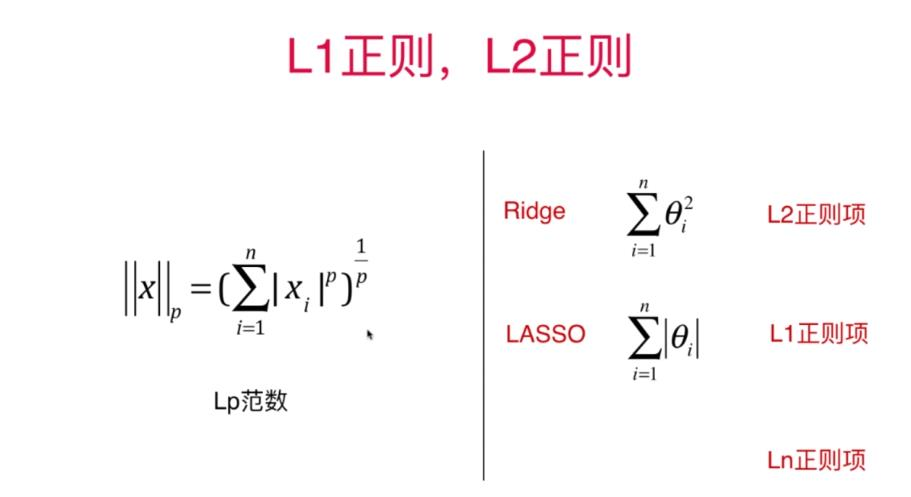
11. 弹性网
    - 一种使用L1和L2先验作为正则化矩阵的线性回归模型，用于只有很少的权重非零的稀疏模型
    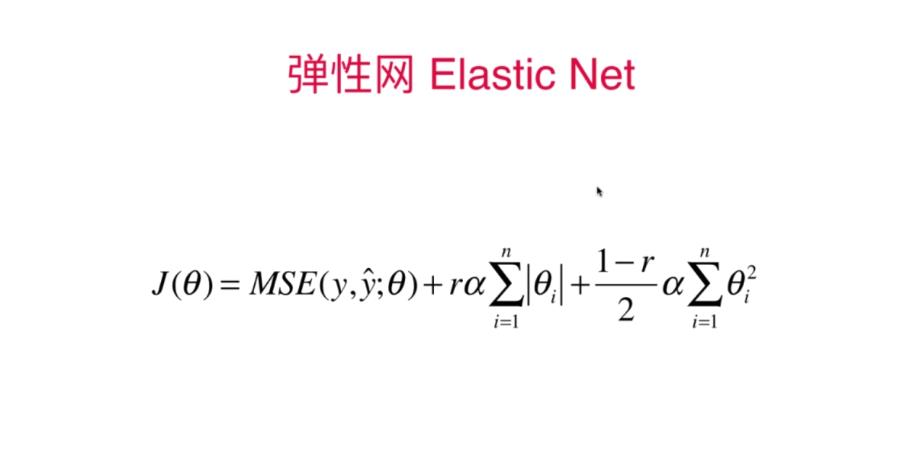

# 模拟实现多项式回归

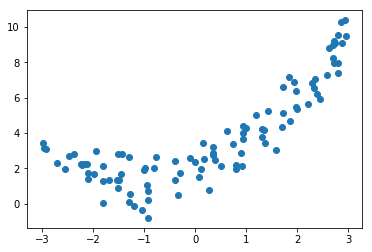

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

### 先用线性回归模拟数据

In [3]:
lin_reg = LinearRegression()  
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

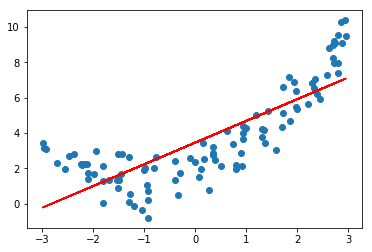

In [4]:
y_predict = lin_reg.predict(X)

plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()  #使用线性回归模拟数据的效果并不好

### 添加特征，使用多项式回归进行模拟

In [5]:
(X**2).shape

(100, 1)

In [6]:
X2 = np.hstack([X, X**2])  #添加一个2次项特征
X2.shape

(100, 2)

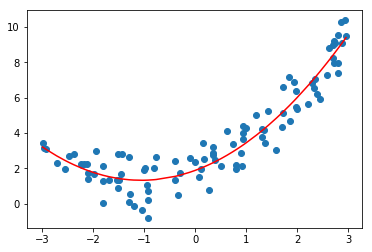

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_  #与预先设定的系数几乎相同

array([ 1.06147627,  0.50289164])

In [11]:
lin_reg2.intercept_  #与预先设定的截距几乎相同

1.8906693890533224

# sklearn中的PolynomialFeatures

### 先用PolynomialFeatures处理成线性关系

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, 100)

In [11]:
poly_feat = PolynomialFeatures(degree=2)  #degree指定最高项次数
poly_feat.fit(X)
X2 = poly_feat.transform(X)  #sklearn会自动添加x零次方的特征

In [12]:
X2.shape

(100, 3)

In [13]:
X2[:5, :]  #下面分别是x的0次方，x的1次方，x的2次方

array([[ 1.        , -2.33393237,  5.44724032],
       [ 1.        , -2.29570518,  5.27026227],
       [ 1.        , -0.85075783,  0.72378888],
       [ 1.        ,  2.62351984,  6.88285637],
       [ 1.        ,  2.32653257,  5.4127538 ]])

In [14]:
X[:5, :]

array([[-2.33393237],
       [-2.29570518],
       [-0.85075783],
       [ 2.62351984],
       [ 2.32653257]])

### 再用LinearRegression进行回归

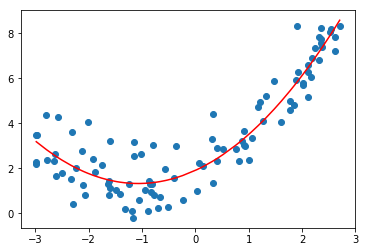

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [16]:
lin_reg2.coef_

array([ 0.        ,  1.08866888,  0.50822486])

In [17]:
lin_reg2.intercept_

1.908439957746932

# PolynomialFeatures中的degree

In [18]:
import numpy as np

X = np.arange(1, 11).reshape(-1, 2)

poly_feat = PolynomialFeatures(degree=3)
poly_feat.fit(X)
X3 = poly_feat.transform(X)

In [19]:
X3.shape

(5, 10)

In [20]:
X3

array([[    1.,     1.,     2.,     1.,     2.,     4.,     1.,     2.,
            4.,     8.],
       [    1.,     3.,     4.,     9.,    12.,    16.,    27.,    36.,
           48.,    64.],
       [    1.,     5.,     6.,    25.,    30.,    36.,   125.,   150.,
          180.,   216.],
       [    1.,     7.,     8.,    49.,    56.,    64.,   343.,   392.,
          448.,   512.],
       [    1.,     9.,    10.,    81.,    90.,   100.,   729.,   810.,
          900.,  1000.]])

# sklearn中的Pipeline：一般对高degree使用

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, 100)

##### sklearn中没有多项式回归的类，所以可以自己简单封装一个

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#下面定义了一个Pipeline对象，封装成了一个多项式类
poly_reg_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('stdScaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_reg_pipe.fit(X, y)
y_predict = poly_reg_pipe.predict(X)

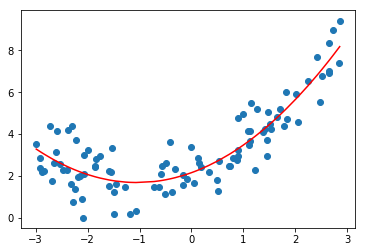

In [26]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# 过拟合与欠拟合

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)

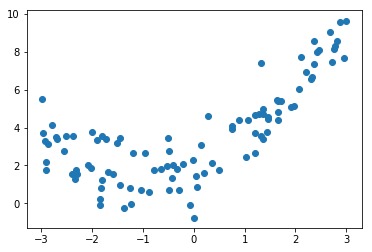

In [5]:
plt.scatter(x, y)
plt.show()

### 使用线性回归和MSE评估

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)  #R^2值不高，代表数据的线性关系不强

0.49537078118650091

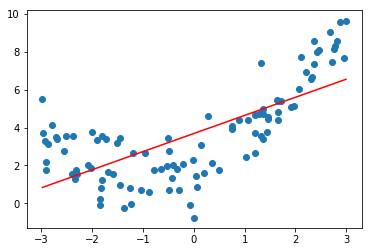

In [7]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

##### 使用MSE进行评估

In [8]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归和MSE评估

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

##### degree=2的情况

In [13]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [14]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

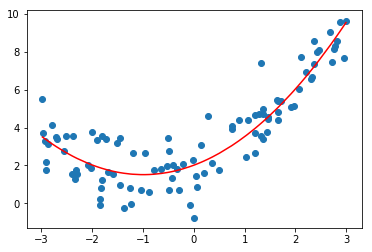

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

##### degree=10的情况

In [18]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764204

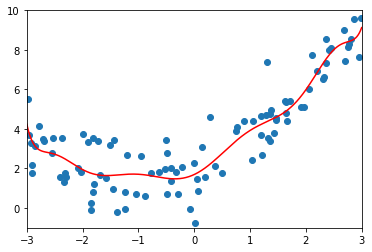

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

##### degree=100的情况（过拟合）

In [20]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6875653386073417

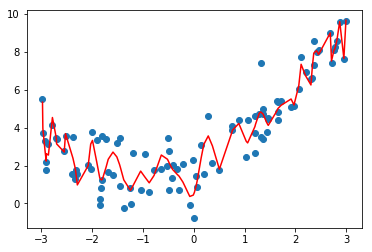

In [21]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()  #但下面的图像并不是真正的图像，因为自变量x的数量太少

##### 下面简单的更真实的模拟一下degree=100的曲线

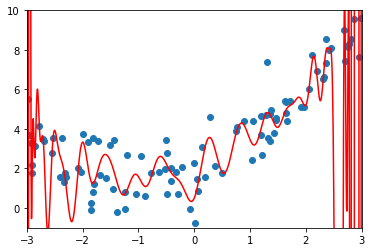

In [23]:
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)  #均匀设置[-3， 3]的1000个自变量
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])  #只显示x轴：[-3, 3]，y轴：[-1, 10]，这是基于已有的数据
plt.show()  #从下图可以看出明显的过拟合情况

# 学习曲线

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(666)
x = np.random.uniform(-3.0, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

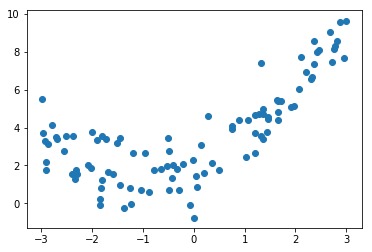

In [93]:
plt.scatter(x, y)
plt.show()

In [94]:
X_train.shape

(75, 1)

### 绘制学习曲线函数

In [100]:
def plot_learning_curve(algorithm, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        algorithm.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algorithm.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algorithm.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train) + 1)],
            np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train) + 1)],
            np.sqrt(test_score), label='test')
    plt.axis([0, 70, 0, 5])  #只关注差异部分
    plt.legend()
    plt.show()

##### 绘制线性回归学习曲线

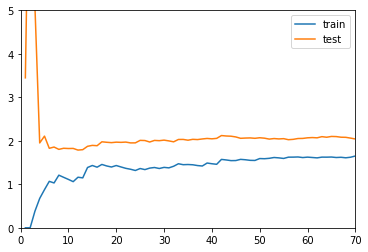

In [101]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

##### 绘制多项式回归学习曲线

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

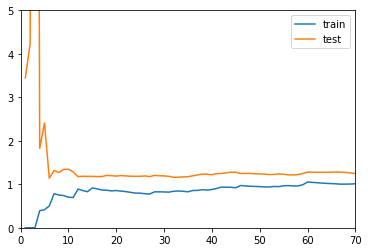

In [103]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

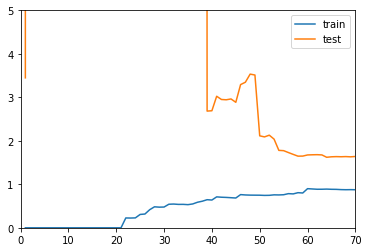

In [104]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

# 岭回归（超参数α）

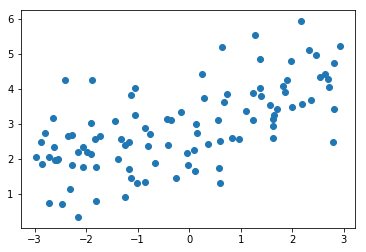

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

### 使用线性回归拟合 

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.94010860007324

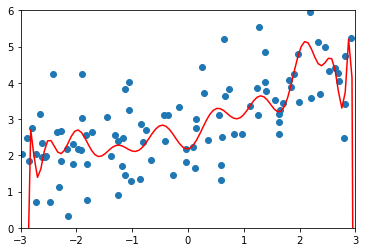

In [5]:
def plot_model(model): 
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

### 使用岭回归拟合

In [6]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

##### degree=20，α=0.0001

In [7]:
ridge_reg1 = RidgeRegression(20, 0.0001)
ridge_reg1.fit(X_train, y_train)

y_predict1 = ridge_reg1.predict(X_test)
mean_squared_error(y_test, y_predict1)

1.3233492754033298

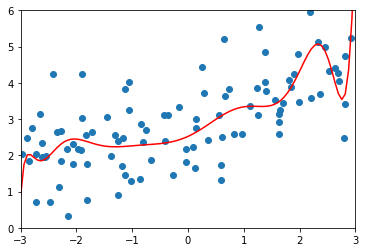

In [8]:
plot_model(ridge_reg1)

##### degree=20，α=1

In [9]:
ridge_reg2 = RidgeRegression(20, 1)
ridge_reg2.fit(X_train, y_train)

y_predict2 = ridge_reg2.predict(X_test)
mean_squared_error(y_test, y_predict2)

1.1888759304218453

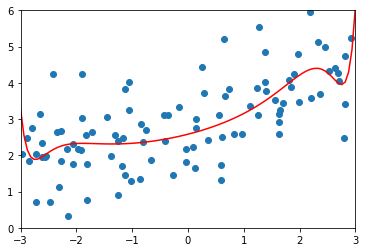

In [10]:
plot_model(ridge_reg2)

##### degree=20，α=100

In [11]:
ridge_reg3 = RidgeRegression(20, 100)
ridge_reg3.fit(X_train, y_train)

y_predict3 = ridge_reg3.predict(X_test)
mean_squared_error(y_test, y_predict3)

1.3196456113086197

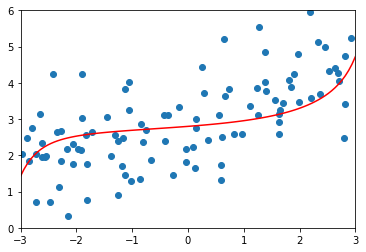

In [12]:
plot_model(ridge_reg3)

##### degree=20，α=100000

In [13]:
ridge_reg4 = RidgeRegression(20, 100000)
ridge_reg4.fit(X_train, y_train)

y_predict4 = ridge_reg4.predict(X_test)
mean_squared_error(y_test, y_predict4)

1.8360988778885547

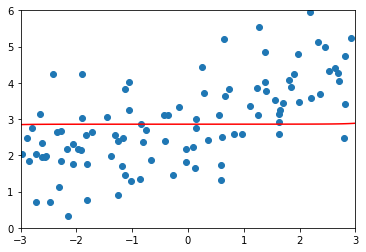

In [14]:
plot_model(ridge_reg4)

# LASSO回归（超参数α）

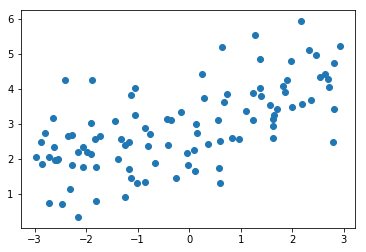

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

### 使用线性回归拟合

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.94010860007324

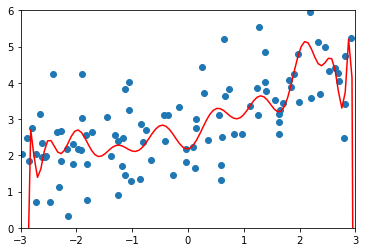

In [18]:
def plot_model(model): 
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

### 使用LASSO回归

In [19]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

##### degree=20，α=0.01

In [20]:
lasso_reg1 = LassoRegression(20, 0.01)
lasso_reg1.fit(X_train, y_train)

y_predict1 = lasso_reg1.predict(X_test)
mean_squared_error(y_test, y_predict1)

1.149608084325997

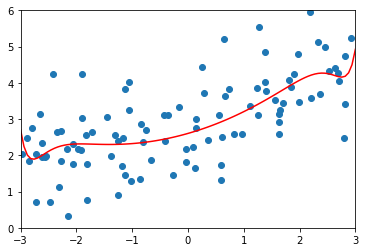

In [21]:
plot_model(lasso_reg1)

##### degree=20，α=0.1

In [22]:
lasso_reg2 = LassoRegression(20, 0.1)
lasso_reg2.fit(X_train, y_train)

y_predict2 = lasso_reg2.predict(X_test)
mean_squared_error(y_test, y_predict2)

1.1213911351818648

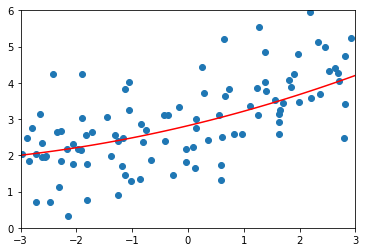

In [23]:
plot_model(lasso_reg2)

##### degree=20，α=1

In [24]:
lasso_reg3 = LassoRegression(20, 1)
lasso_reg3.fit(X_train, y_train)

y_predict1 = lasso_reg3.predict(X_test)
mean_squared_error(y_test, y_predict3)

1.3196456113086197

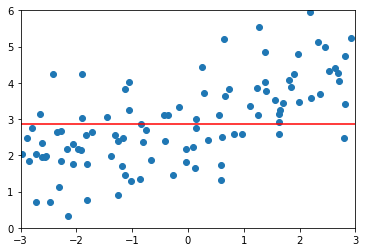

In [25]:
plot_model(lasso_reg3)